Index(['district', 'plot_number', 'lutheran_density', 'orthodox_density',
       'total_density', 'estate_income', 'business_income',
       'salary_pension_income', 'total_income', 'total_income_log', 'x', 'y',
       'geometry'],
      dtype='object')

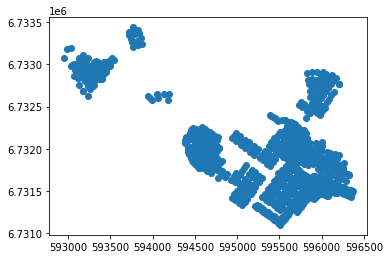

In [18]:
from pathlib import Path

import numpy as np
import arviz as az
import pymc3 as pm
import geopandas as gpd
import cufflinks as cf

cf.go_offline()
data_dir = Path('../data')
data = gpd.read_file(data_dir / 'interim' / 'spatial_income_1880.gpkg')
data.plot()
data.columns

In [17]:
with pm.Model as model_1:
    F_k = data.is_old
    lambda_W = 1/2
    W_k = pm.Exponential('W_k', lambda_W, observed=data.total_income)
    mu_beta = np.array([0., 0., 0., 0.])
    sigma_beta = np.array(np.diagflat([0.25, 0.25, 0.25, 0.25]))
    beta = pm.MvNormal('beta', mu_beta, sigma_beta, shape=4)

AttributeError: __enter__